<a href="https://colab.research.google.com/github/ImNotDanish05/2025_Statistika_TI-1A/blob/main/SPSS%20Data%20Produksi%20Gelas%20Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''
# 📊 Dummy Data Generator: Uji Korelasi Spearman

Program Python ini dibuat untuk **menghasilkan dataset dummy** berisi 50 data dengan 3 variabel:
- Tingkat_Kerusakan (Ordinal: 1–5)
- Jenis_Gelas (Nominal: 1–5)
- Warna_Gelas (Nominal: 1–4)

Tujuan dataset ini:
✅ Supaya saat diuji dengan korelasi Spearman:
- Tingkat_Kerusakan vs Jenis_Gelas → korelasi negatif & signifikan (**p < 1%**)
- Tingkat_Kerusakan vs Warna_Gelas → korelasi negatif & signifikan (**p < 1%**)
- Jenis_Gelas vs Warna_Gelas → korelasi positif & signifikan (**p < 1%**)

Nilai korelasi dibuat cukup kuat (sekitar ±0.8–0.9) tapi tidak 100% sempurna, agar data terlihat lebih realistis.

---

## 📦 **Output program:**
- DataFrame (50 data) dengan kolom: Tingkat_Kerusakan, Jenis_Gelas, Warna_Gelas
- Hasil korelasi Spearman: nilai korelasi dan p-value untuk ketiga pasangan variabel

Data ini bisa langsung digunakan di SPSS, Python, atau software statistik lain untuk uji bivariat Spearman.

✨ Semoga bermanfaat!
'''


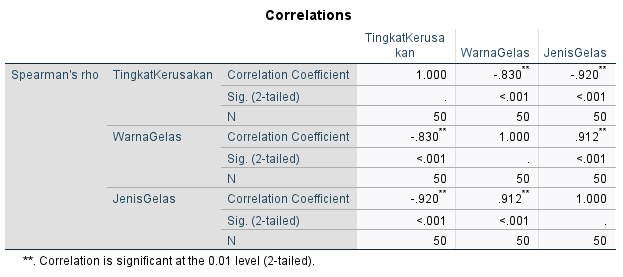

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# Jumlah data
n = 50

# Generate Jenis Gelas (1-5)
jenis_gelas = np.random.randint(1, 6, size=n)

# Buat Tingkat Kerusakan negatif berkorelasi dengan Jenis Gelas
# Misalnya semakin tinggi jenis_gelas, semakin rendah tingkat kerusakan
tingkat_kerusakan = 6 - jenis_gelas + np.random.normal(0, 0.5, n)
tingkat_kerusakan = np.clip(np.round(tingkat_kerusakan), 1, 5).astype(int)

# Buat Warna Gelas negatif berkorelasi dengan Tingkat Kerusakan
# dan positif berkorelasi dengan Jenis Gelas
# Caranya: Warna Gelas mirip dengan Jenis Gelas + noise
warna_gelas = jenis_gelas + np.random.normal(0, 0.5, n)
warna_gelas = np.clip(np.round(warna_gelas), 1, 4).astype(int)

# Buat dataframe
df = pd.DataFrame({
    'Tingkat_Kerusakan': tingkat_kerusakan,
    'Jenis_Gelas': jenis_gelas,
    'Warna_Gelas': warna_gelas
})

# Cek korelasi dan signifikansi
corr_tk_jg, p_tk_jg = spearmanr(df['Tingkat_Kerusakan'], df['Jenis_Gelas'])
corr_tk_wg, p_tk_wg = spearmanr(df['Tingkat_Kerusakan'], df['Warna_Gelas'])
corr_jg_wg, p_jg_wg = spearmanr(df['Jenis_Gelas'], df['Warna_Gelas'])

excel_file_path = "data_Uji Korelasi Spearman.xlsx"
df.to_excel(excel_file_path, index=False)

'''
# 📊 Dummy Data Generator: Uji Korelasi Pearson

Program ini menghasilkan dataset dummy 50 data:
- TargetProduksi (100–999, angka cantik)
- BanyakGelas (100–999)
- GelasRusak (10–99)

Tujuan:
✅ TargetProduksi vs GelasRusak → Negatif & signifikan (**p < 1%**)
✅ GelasRusak vs BanyakGelas → Negatif & signifikan (**p < 1%**)
✅ TargetProduksi vs BanyakGelas → Positif, tapi **tidak signifikan** (p > 5%)

Nilai korelasi dibuat realistis, cocok untuk uji bivariat Pearson di SPSS atau Python.
'''

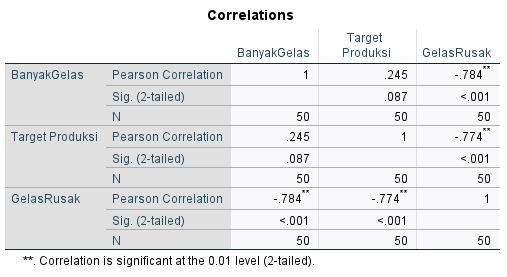

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# np.random.seed(42)
n = 50

# TargetProduksi: angka cantik
target_produksi = np.random.choice(
    np.round(np.linspace(100, 999, num=900)), size=n, replace=True
).astype(int)

# BanyakGelas: Positif korelasi ke TargetProduksi tapi p>0.05 → noise besar
banyak_gelas = target_produksi * 0.3 + np.random.normal(0, 400, n)
banyak_gelas = np.clip(np.round(banyak_gelas), 100, 999).astype(int)

# GelasRusak: Negatif kuat ke TargetProduksi dan BanyakGelas → noise kecil
gelas_rusak = 100 - (target_produksi / 20) - (banyak_gelas / 20) + np.random.normal(0, 3, n)
gelas_rusak = np.clip(np.round(gelas_rusak), 10, 99).astype(int)

# Uji korelasi
df = pd.DataFrame({
    'TargetProduksi': target_produksi,
    'BanyakGelas': banyak_gelas,
    'GelasRusak': gelas_rusak
})

corr_tp_bg, p_tp_bg = pearsonr(df['TargetProduksi'], df['BanyakGelas'])
corr_tp_gr, p_tp_gr = pearsonr(df['TargetProduksi'], df['GelasRusak'])
corr_gr_bg, p_gr_bg = pearsonr(df['GelasRusak'], df['BanyakGelas'])

excel_file_path = "data_Uji Korelasi Pearson 2.xlsx"
df.to_excel(excel_file_path, index=False)

'''
# 📊 Dummy Data Generator: Uji Korelasi Pearson  (1 Signifikan, 2 Tidak Signifikan)

Program Python ini dibuat untuk **menghasilkan dataset dummy** berisi 50 data:
- TargetProduksi (scale, 100–999, angka cantik)
- BanyakGelas (scale, 100–999, selalu lebih kecil atau mendekati TargetProduksi)
- GelasRusak (scale, 10–99)

Tujuan dataset ini:
✅ Saat diuji korelasi Pearson:
- TargetProduksi vs GelasRusak → korelasi negatif, signifikan (**p < 1%**)
- TargetProduksi vs BanyakGelas → korelasi positif, tapi **tidak signifikan** (p > 5%)
- GelasRusak vs BanyakGelas → korelasi negatif, tapi **tidak signifikan** (p > 5%)

Nilai korelasi dibuat realistis, tidak 100%, dan data bisa langsung dipakai untuk uji bivariat di SPSS atau Python.
'''


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

n = 50

# TargetProduksi: angka cantik 100–999
target_produksi = np.random.choice(
    np.round(np.linspace(100, 999, num=900)), size=n, replace=True
).astype(int)

# BanyakGelas: Positif korelasi tapi lemah (noise besar supaya p > 0.05)
banyak_gelas = target_produksi * 0.4 + np.random.normal(0, 400, n)
banyak_gelas = np.clip(np.round(banyak_gelas), 100, 999).astype(int)

# GelasRusak: Negatif korelasi signifikan dengan TargetProduksi (noise kecil)
gelas_rusak = 120 - (target_produksi / 10) + np.random.normal(0, 5, n)
gelas_rusak = np.clip(np.round(gelas_rusak), 10, 99).astype(int)

# Uji korelasi Pearson
df = pd.DataFrame({
    'TargetProduksi': target_produksi,
    'BanyakGelas': banyak_gelas,
    'GelasRusak': gelas_rusak
})

corr_tp_bg, p_tp_bg = pearsonr(df['TargetProduksi'], df['BanyakGelas'])
corr_tp_gr, p_tp_gr = pearsonr(df['TargetProduksi'], df['GelasRusak'])
corr_gr_bg, p_gr_bg = pearsonr(df['GelasRusak'], df['BanyakGelas'])

excel_file_path = "data_Uji Korelasi Pearson.xlsx"
df.to_excel(excel_file_path, index=False)